In [4]:
import os
import sys
sys.path.append("../../")

import numpy as np
import matplotlib.pyplot as plt

from var_objective.simulators.wave_equation import WaveEquationDirichlet1D
from var_objective.conditions import get_conditions_set

C:\Users\krkac\AppData\Local\Temp\ipykernel_37388\4245228374.py:20: RuntimeWarning: divide by zero encountered in log
  settings[1].append({'name':'mse_0.015','k':0.9779,'source':lambda X: 3.1636*np.log(np.abs(np.log(0.7137*X[0])))})


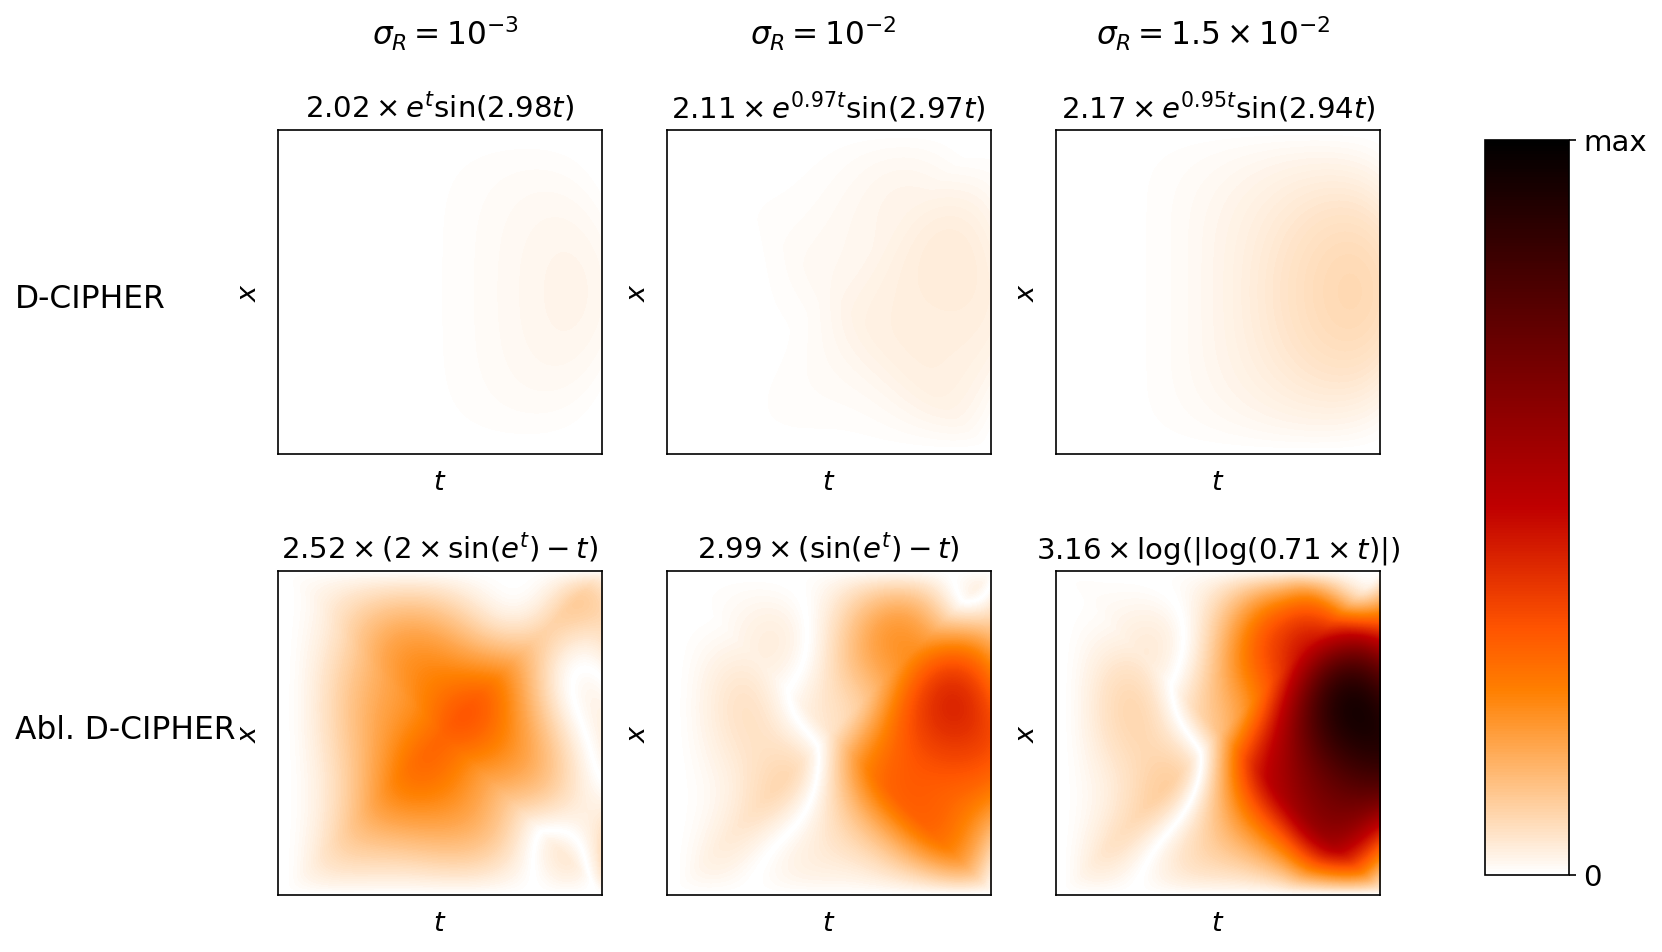

In [5]:


conditions = get_conditions_set('HeatRandom',params={'num_samples':10,'seed':437782})
widths = [2.0,2.0]

chosen_c = 6

settings = [[],[]]

org_setting = {'name':'org','k':1.0,'source':lambda X: 2*np.exp(X[0])*np.sin(3*X[0])}

# These are rescaled equations extracted from the results generated by script in ../run_scripts/Figure_5.sh

settings[0].append({'name':'var_0.001','k':1.0,'source':lambda X: 2.021*np.exp(X[0])*np.sin(2.9772*X[0])})

settings[0].append({'name':'var_0.01','k':1.0011,'source':lambda X: 2.1124*np.exp(0.9711*X[0])*np.sin(2.9706*X[0])})

settings[1].append({'name':'mse_0.001','k':0.9879,'source':lambda X: 2.5227*(-X[0]+2*np.sin(np.exp(X[0])))})

settings[1].append({'name':'mse_0.01','k':0.9839,'source':lambda X: 2.9860*(-X[0]+np.sin(np.exp(X[0])))})

settings[0].append({'name':'var_0.015','k':1.0,'source':lambda X: 2.1763*np.exp(0.9504*X[0])*np.sin(2.9439*X[0])})

settings[1].append({'name':'mse_0.015','k':0.9779,'source':lambda X: 3.1636*np.log(np.abs(np.log(0.7137*X[0])))})

condition = conditions.get_condition_functions(chosen_c)

org_k = org_setting['k']
org_source = org_setting['source']

initial_wave = condition[0]

org_wave_eq = WaveEquationDirichlet1D(org_k,org_source,initial_wave)

org_sol = org_wave_eq.idm(widths[0],widths[1],0.001,0.001)


fig, axs = plt.subplots(2, 3,figsize=(14,7),dpi=150)
vmin = 0
vmax = 3.0
subtitle_fontsize = 14
noise_fontsize = 15
algo_fontsize = 15
label_fontsize = 13
barticks_fontsize = 14
eqs = [[r'$2.02\times e^{t}\sin(2.98t)$',r'$2.11\times e^{0.97t}\sin(2.97t)$',r'$2.17\times e^{0.95t}\sin(2.94t)$'],
    [r'$2.52\times (2\times \sin(e^{t})-t)$',r'$2.99\times (\sin(e^{t})-t)$',r'$3.16 \times \log(|\log(0.71 \times t)|)$']]
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_xlabel(r'$t$',fontsize=label_fontsize)
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_ylabel(r'$x$',fontsize=label_fontsize)
        ax.title.set_text(eqs[i][j])
        ax.title.set_fontsize(subtitle_fontsize)

        k = settings[i][j]['k']
        source = settings[i][j]['source']
        name = settings[i][j]['name']
        
        wave_eq = WaveEquationDirichlet1D(k,source,initial_wave)
        sol = wave_eq.idm(widths[0],widths[1],0.001,0.001)

        im = ax.imshow(np.transpose(np.abs(sol-org_sol)),cmap=plt.get_cmap('gist_heat_r'),interpolation='nearest',vmin=vmin,vmax=vmax)
        
fig.subplots_adjust(right=0.65)
cbar_ax = fig.add_axes([0.70, 0.15, 0.04, 0.7])
b = fig.colorbar(im,cax=cbar_ax)
b.set_ticks([0,3.0])
b.set_ticklabels(['0','max'])
b.ax.tick_params(labelsize=barticks_fontsize)
fig.text(0, 0.69, "D-CIPHER", fontsize=algo_fontsize)
fig.text(0, 0.28, "Abl. D-CIPHER", fontsize=algo_fontsize)
fig.text(0.17, 0.94, r'$\sigma_R=10^{-3}$',fontsize=noise_fontsize)
fig.text(0.35, 0.94, r'$\sigma_R=10^{-2}$',fontsize=noise_fontsize)
fig.text(0.515, 0.94, r'$\sigma_R=1.5\times10^{-2}$',fontsize=noise_fontsize)

plt.savefig(f'figures/Figure_5.pdf')